In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler as SS
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge


In [46]:
path_data = 'api data' #denote which folder data is stored
file_name = 'month_deposit.csv' #denote file name
path_to_data = os.path.join(path_data, file_name) #string together path to the data for computer
df = pd.read_csv(path_to_data) #read the actual file, knowing it's separated by tabs and feeding it as the 2nd argument to the computer
#the result of df should be a dataframe
df

,month,deposits
0,5,1.200000e+01
1,29,5.000000e+00
2,37,3.011200e+04
3,126,9.022000e+02
4,15541,1.000000e+09
...,...,...
156,199594,1.000000e+02
157,201158,3.000000e+04
158,219151,3.000000e+04
159,223004,3.000000e+04


In [47]:
#TODO:
    #Plot the data on scatter plot to see what it looks like
    #Force linear regression, if not good force ridge regression, if not good force lasso regression
        #If Ridge or Lasso do KFold to make sure not overfitting
    #Predict 100 times, add each time as a line in a file output
X = df['month']
Y = df['deposits']
df[120:150]

,month,deposits
120,24243,2.761800e+04
121,24244,2.368700e+04
122,24245,2.644240e+04
123,24246,1.268030e+05
124,24247,2.404900e+04
125,24248,3.000000e+46
126,24249,3.075196e+07
127,24250,1.349800e+04
128,24251,1.500000e+03
129,24252,5.440000e+02


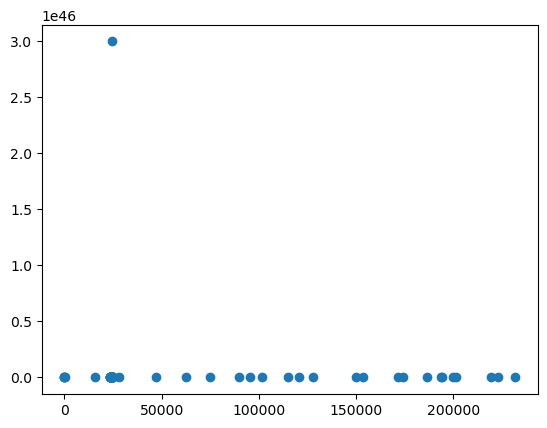

In [48]:
plt.scatter(X, Y)

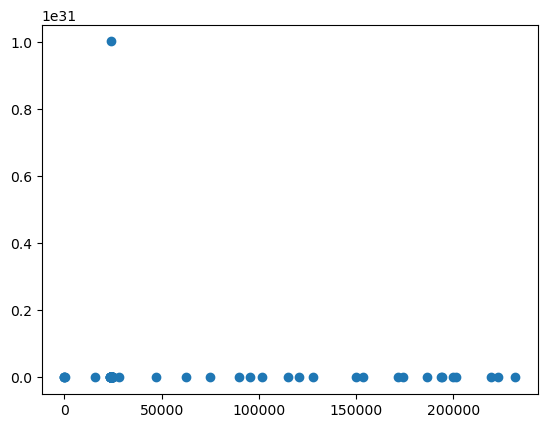

In [49]:
df = df.drop(125)
X = df['month']
Y = df['deposits']
plt.scatter(X, Y)

In [50]:
path_data = 'api data' #denote which folder data is stored
file_name = 'month_deposit.csv' #denote file name
path_to_data = os.path.join(path_data, file_name) #string together path to the data for computer
df = pd.read_csv(path_to_data) #read the actual file, knowing it's separated by tabs and feeding it as the 2nd argument to the computer
#the result of df should be a dataframe
df

,month,deposits
0,5,1.200000e+01
1,29,5.000000e+00
2,37,3.011200e+04
3,126,9.022000e+02
4,15541,1.000000e+09
...,...,...
156,199594,1.000000e+02
157,201158,3.000000e+04
158,219151,3.000000e+04
159,223004,3.000000e+04


In [51]:
#Standardize data (preprocessing)
# Initialize the scaler
ss = SS()

Xs = ss.fit_transform(df)

# Stick the transformed data back into a dataframe, for easier viewing
Xdf_s = pd.DataFrame(Xs, columns=['ssMonth', 'ssDeposits'])
Xdf_s

,ssMonth,ssDeposits
0,-0.847721,-0.079057
1,-0.847210,-0.079057
2,-0.847039,-0.079057
3,-0.845143,-0.079057
4,-0.516751,-0.079057
...,...,...
156,3.404207,-0.079057
157,3.437526,-0.079057
158,3.820838,-0.079057
159,3.902920,-0.079057


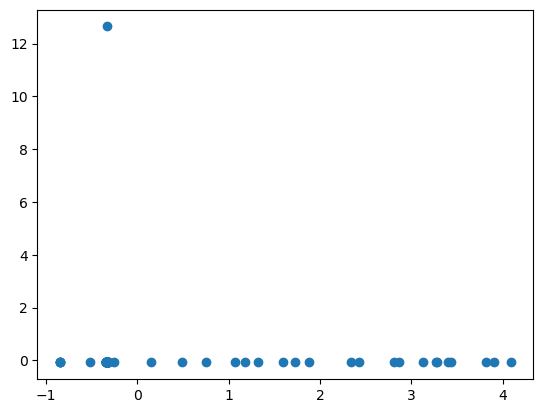

In [52]:
X = Xdf_s['ssMonth']
Y = Xdf_s['ssDeposits']
plt.scatter(X, Y)

In [53]:
df

,month,deposits
0,5,1.200000e+01
1,29,5.000000e+00
2,37,3.011200e+04
3,126,9.022000e+02
4,15541,1.000000e+09
...,...,...
156,199594,1.000000e+02
157,201158,3.000000e+04
158,219151,3.000000e+04
159,223004,3.000000e+04


In [54]:
r = np.corrcoef(df['month'], df['deposits'])
r

array([[ 1.        , -0.02618858],
       [-0.02618858,  1.        ]])

In [16]:
df = df.drop('country', axis=1)
df = df.drop('continent', axis=1)
df

,year,lifeExp,pop,gdpPercap
0,1952,28.801,8425333,779.445314
1,1957,30.332,9240934,820.853030
2,1962,31.997,10267083,853.100710
3,1967,34.020,11537966,836.197138
4,1972,36.088,13079460,739.981106
...,...,...,...,...
1699,1987,62.351,9216418,706.157306
1700,1992,60.377,10704340,693.420786
1701,1997,46.809,11404948,792.449960
1702,2002,39.989,11926563,672.038623


In [8]:
r = np.corrcoef(df['year'], df['lifeExp'])
r

array([[1.        , 0.43561122],
       [0.43561122, 1.        ]])

In [18]:
#don't bother, this is standardization. Makes everything uniform scale. We are only comparing two variables on one scale so no need
    #plus I forgor how to predict with the new standard deviation values. 
ss = SS()
Xs = ss.fit_transform(df)

Xdf_s = pd.DataFrame(Xs, columns = ['years', 'lifeExp', 'pop', 'gdpPercap']) #change to : columns = ['month','deposits'] when you get actual dataset
Xdf_s

,years,lifeExp,pop,gdpPercap
0,-1.593255,-2.375334,-0.199534,-0.653087
1,-1.303572,-2.256774,-0.191849,-0.648885
2,-1.013890,-2.127837,-0.182180,-0.645612
3,-0.724207,-1.971178,-0.170204,-0.647328
4,-0.434524,-1.811033,-0.155679,-0.657091
...,...,...,...,...
1699,0.434524,0.222759,-0.192080,-0.660524
1700,0.724207,0.069894,-0.178059,-0.661816
1701,1.013890,-0.980805,-0.171458,-0.651767
1702,1.303572,-1.508942,-0.166543,-0.663986


In [31]:
X = Xdf_s['years']
Y = Xdf_s['lifeExp']

lin_reg = LR()
lin_reg.fit(X.values.reshape(-1,1),Y)

X_predict = [[2007]]
Y_predict = lin_reg.predict(X_predict)

Y_predict

array([874.27172668])

In [35]:
X1 = df['year']
Y1 = df['lifeExp']

lin_reg1 = LR()
lin_reg1.fit(X1.values.reshape(-1,1),Y1)

X1_predict = [[2007]]
Y1_predict = lin_reg1.predict(X1_predict)

Y1_predict

array([68.43679463])

In [37]:
lin_reg1.score(X1.values.reshape(-1,1), Y1)

0.18975713852188814

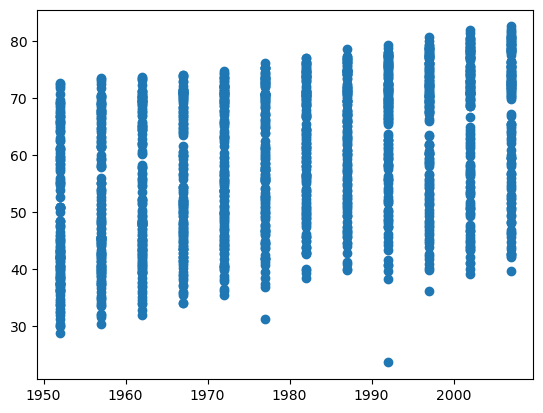

In [38]:
plt.scatter(X1, Y1)

In [39]:
#check for overfitting
def DoKFold(model, X, y, k, random_state=201):
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    
    training_scores = []
    testing_scores = []
    
    if type(X) == type(pd.DataFrame()):
        X = X.values
    
    for idxTrain, idxTest in kf.split(X):
        # Get the training data
        Xtrain = X[idxTrain, :]
        ytrain = y[idxTrain]
        # Get the testing data
        Xtest = X[idxTest, :]
        ytest = y[idxTest]

        # Fit the model to the training data
        model.fit(Xtrain,ytrain)

        # Record the training and testing scores
        training_scores.append(model.score(Xtrain,ytrain))
        testing_scores.append(model.score(Xtest,ytest))

    return training_scores, testing_scores